# 와인(wine) 데이터로 결정트리 훈련과 평가하기

In [1]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['DESCR', 'feature_names', 'target_names', 'data', 'target'])

In [2]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 1. 와인 데이터를 8대2의 비율로 학습 데이터와 평가 데이터로 분할한 후, 학습 데이터에 대해 결정트리를 훈련하세요.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine_pd = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                      columns=wine['feature_names'] + ['target'])
train_set, test_set = train_test_split(wine_pd, test_size=0.2, random_state=42)
train_set.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,2.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0.0


#### a) criterion='gini' 일때,

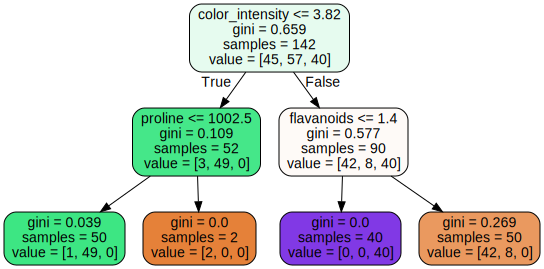

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)

features = list(train_set.columns[:-1])

X = train_set[features]
y = train_set['target']

tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file='wine_tree_gini.dot',
    feature_names=features,
    rounded=True,
    filled=True)

with open("wine_tree_gini.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='wine_tree_gini', directory='./', cleanup=True)
dot

#### b) criterion='entropy' 일때,

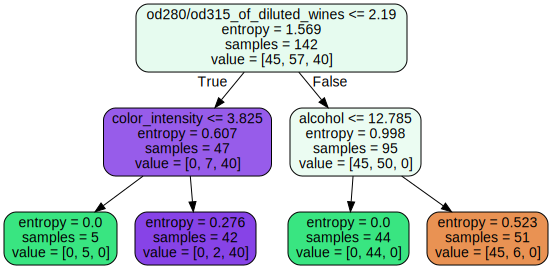

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

features = list(train_set.columns[:-1])

X = train_set[features]
y = train_set['target']

tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file='wine_tree_entropy.dot',
    feature_names=features,
    rounded=True,
    filled=True)

with open("wine_tree_entropy.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='wine_tree_entropy', directory='./', cleanup=True)
dot

#### c) criterion='gini', max_depth=10 일때,

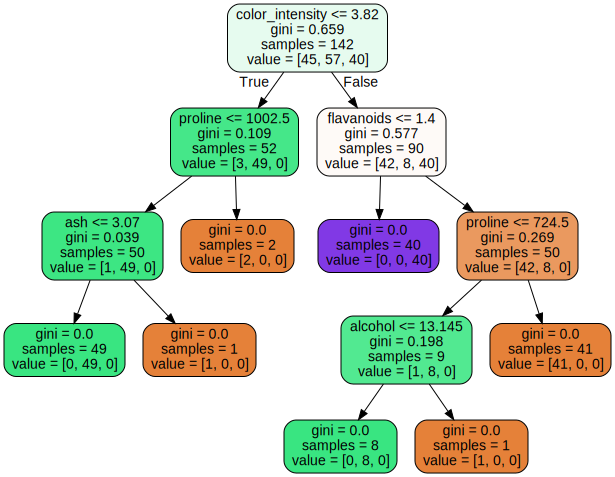

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10)

features = list(train_set.columns[:-1])

X = train_set[features]
y = train_set['target']

tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file='wine_tree_gini_depth10.dot',
    feature_names=features,
    rounded=True,
    filled=True)

with open("wine_tree_gini_depth10.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='wine_tree_gini_depth10', directory='./', cleanup=True)
dot

#### d) criterion='entropy', max_depth=10 일때,

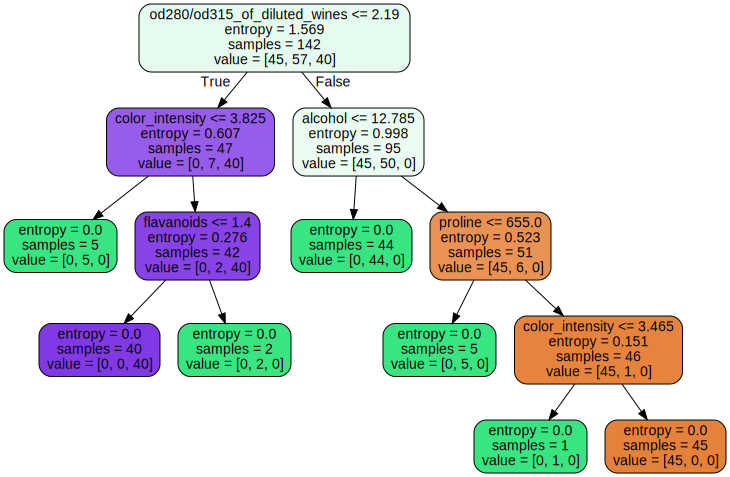

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

features = list(train_set.columns[:-1])

X = train_set[features]
y = train_set['target']

tree_clf.fit(X, y)

export_graphviz(
    tree_clf,
    out_file='wine_tree_entropy_depth10.dot',
    feature_names=features,
    rounded=True,
    filled=True)

with open("wine_tree_entropy_depth10.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='wine_tree_entropy_depth10', directory='./', cleanup=True)
dot

### 2. 평가 데이터에서 훈련된 결정트리의 성능을 측정하세요.

#### a) criterion='gini' 일때,

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

X_test = test_set[features]
y_test = test_set['target']
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1  0]
 [ 3 11  0]
 [ 1  0  7]]
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.92      0.79      0.85        14
         2.0       1.00      0.88      0.93         8

   micro avg       0.86      0.86      0.86        36
   macro avg       0.89      0.86      0.87        36
weighted avg       0.88      0.86      0.86        36



#### b) criterion='entropy' 일때,

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

X_test = test_set[features]
y_test = test_set['target']
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 1 13  0]
 [ 2  0  6]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       1.00      0.93      0.96        14
         2.0       1.00      0.75      0.86         8

   micro avg       0.92      0.92      0.92        36
   macro avg       0.94      0.89      0.91        36
weighted avg       0.93      0.92      0.92        36



#### c) criterion='gini', max_depth=10 일때,

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

X_test = test_set[features]
y_test = test_set['target']
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

   micro avg       0.94      0.94      0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



#### d) criterion='entropy', max_depth=10 일때,

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

X_test = test_set[features]
y_test = test_set['target']
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 14  0]
 [ 1  2  5]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        14
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.62      0.77         8

   micro avg       0.92      0.92      0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



### 3. DecisionTreeClassifier()에서 criterion 매개변수를 '지니 불순도(gini)'나 '엔트로피(entropy)'로 바꿧을 때 훈련된 결정트리와 그 성능에 어떤 차이가 있는지 설명하시오.

- criterion 매개변수로 gini를 사용했을 때는 가장 중요한 특성이 color_intensity라는 것을 알 수 있음.
- 반면에 criterion 매개변수로 entropy를 사용했을 때는 가장 중요한 특성이 od280/od315_of_diluted_wines라는 것을 알 수 있음.
- 또한 precision, recall, f1-score의 3가지 성능지표에 대한 결과로 보았을 때, entropy를 사용한 성능이 gini를 사용했을 때 보다 증가함.

### 4. DecisionTreeClassifier()에서 max_depth의 값을 바꿨을 때 훈련된 결정트리의 모양과 그 성능에 어떤 차이가 있는지 설명하시오.

- max_depth를 2에서 10으로 늘렸을 경우 결정트리의 모양이 복잡해지고 더 깊은 트리의 모양이 나타남.
- precision, recall, f1-score의 3가지 성능지표에 대한 결과로 보았을 때, max_depth=10를 사용한 성능이 max_depth=2를 사용했을 때 보다 증가함.